# python 시각화 라이브러리 : Seaborn

- 기본적 시각화 기능은 `Matplotlib` 라이브러리에 의존하고, 통계 기능은 `Statsmodels` 라이브러리에 의존
- `Matplotlib`을 기반으로 다양한 색상과 통계용 차트 등의 기능을 추가한 `패키지`
- `Matplotlib`이 복잡한 데이터를 시각화 가능하게 한다면, `Seaborn`은 복잡한 데이터를 쉽게 표현
- `Seaborn`은 `Matplotlib`의 확장팩 개념이라 `Seaborn & Matplotlib` 패키지를 모두 `import` 필수
- **장점:**
> - 시각적 디지인이 뛰어나고 `Matplotlib`보다 훨씬 다양한 색상
> - 코드가 간결하여 사용하기 쉽고 통계와 그래프 그리기를 동시에 가능
> - `DataFrame`에 최적화 되어 활용이 쉬움
> - `DataFrame`을 통계적으로 집계하여 쉽게 차트로 요약 가능

## Data Load

In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
titanic = sns.load_dataset('titanic') 
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


## 기본 사용법



In [6]:
# 한글을 사용하려면 본인 PC에 설치된 폰트의 종류를 알아야 함
# 본인 PC에 설치되지 않은 폰트는 사용할 수 없음
import matplotlib.font_manager

fontlist = [font.name for font in matplotlib.font_manager.fontManager.ttflist]

# mac
if 'AppleGothic' in fontlist:
    mpl.rc('font', family='AppleGothic')
# 음수기호 표시
mpl.rc('axes', unicode_minus=False)

## 카테고리형들 간의 데이터 관계 확인(Categorical Plots)

> **"카테고리형 변수와 실수형 변수 간의 관계를 나타내기 위한 시각화"**

- `countplot`
- `barplot`
- `boxplot`
- `violinplot`
- `stripplot`
- `swarmplot`
- `pointplot`
- `catplot`: <span style = "color : red">위 모든 시각화 표현 가능 </span>


### Count Plot
> - `countplot`: 카테고리 값들에 따른 데이터 갯수 표현

#### 기본 사용

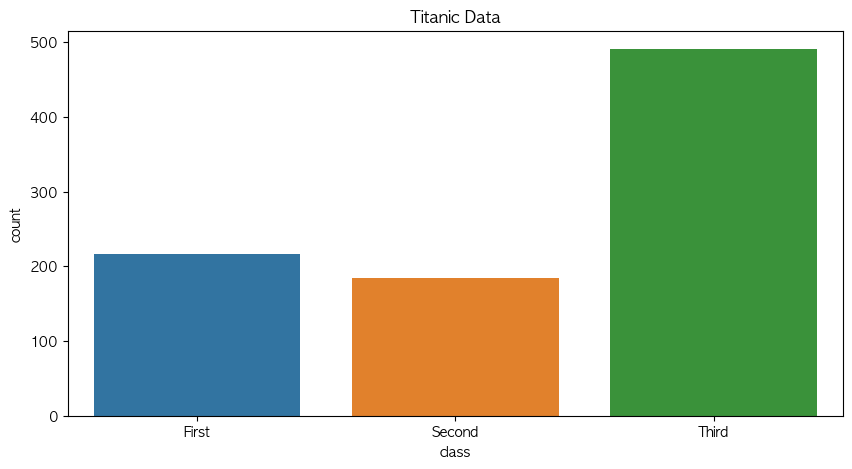

In [7]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.countplot(data=titanic, x='class')
plt.title('Titanic Data')
plt.show()

#### hue 속성

세부 집단 추가 가능

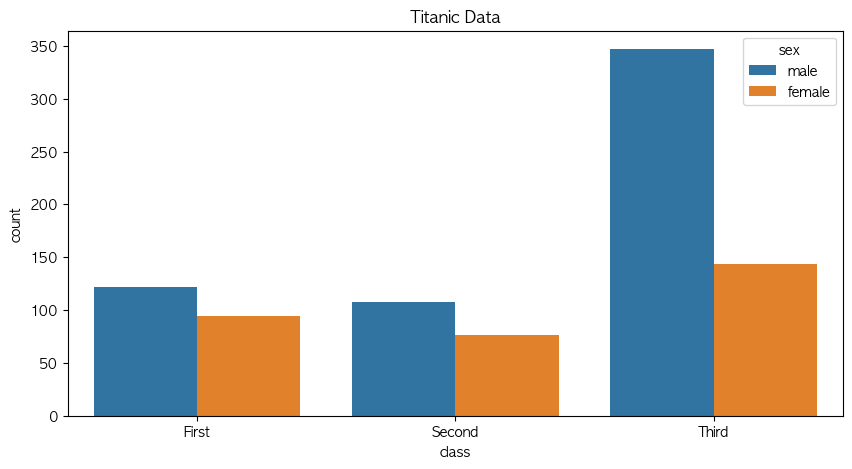

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=titanic, x='class', hue='sex')
plt.title('Titanic Data')
plt.show()

### Bar Chart 

카테고리 별 실수 값 차이 확인

- 2개의 변수를 비교하는 `이변량(Bivariate)` 분석을 위한 시각화
- `x축`에는 카테고리 변수, `y축`에는 실수형 변수 (반대도 가능)
- 카테고리 항목에 따른 실수 값, 평균, 편차 등을 비교하는데 사용
- 막대 그래프에 오차를 기본적으로 포함하여 오차의 범위를 막대의 형식으로 표시
- **Error Bar:** 입력한 데이터 기반 유사한 상황의 95%가 오차 막대 이내의 결과를 얻을 것

#### 기본 사용

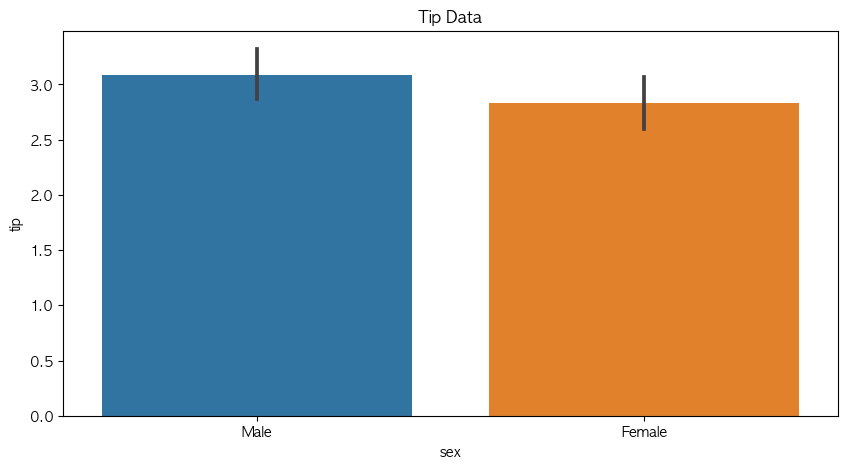

In [9]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.barplot(data=tips, x='sex', y='tip')
plt.title('Tip Data')
plt.show()

#### estimator

표기 값 변경 가능

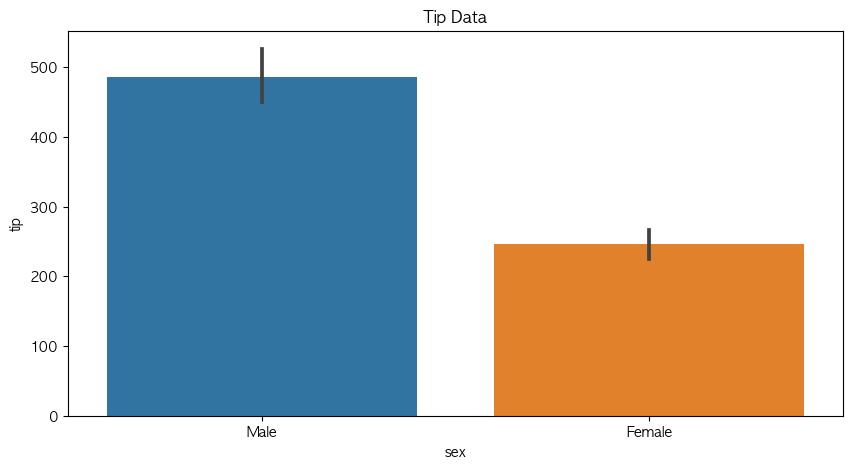

In [10]:
# 기본 사용
# estimator 키워드 인수 사용하여 표기 값 변경 가능
plt.figure(figsize=(10,5))
sns.barplot(data=tips, x='sex', y='tip', estimator=sum)
plt.title('Tip Data')
plt.show()

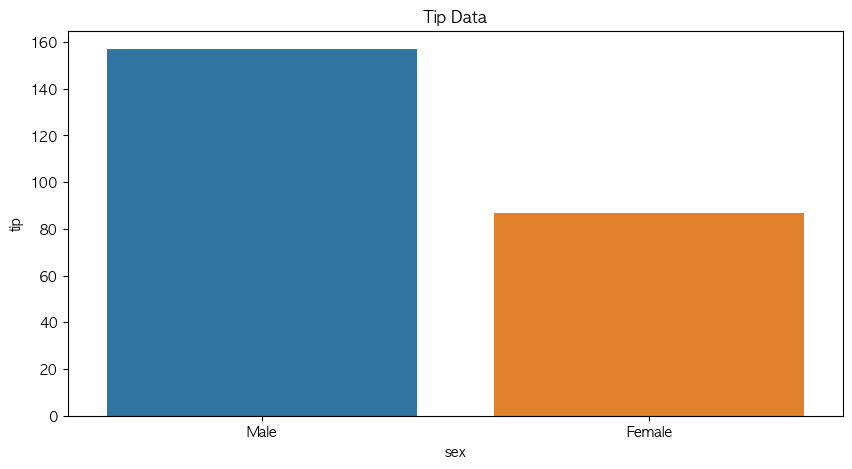

In [12]:
# 기본 사용
# estimator 키워드 인수 사용하여 표기 값 변경 가능
plt.figure(figsize=(10,5))
sns.barplot(data=tips, x='sex', y='tip', estimator=len)
plt.title('Tip Data')
plt.show()

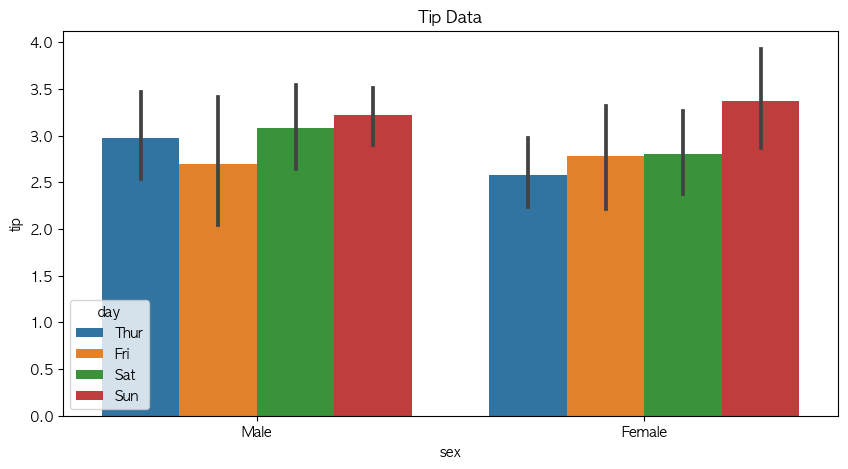

In [13]:
import numpy as np

# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
plt.figure(figsize=(10,5))
sns.barplot(data=tips, x='sex', y='tip', estimator=np.mean, hue='day')
plt.title('Tip Data')
plt.show()

#### ci 속성

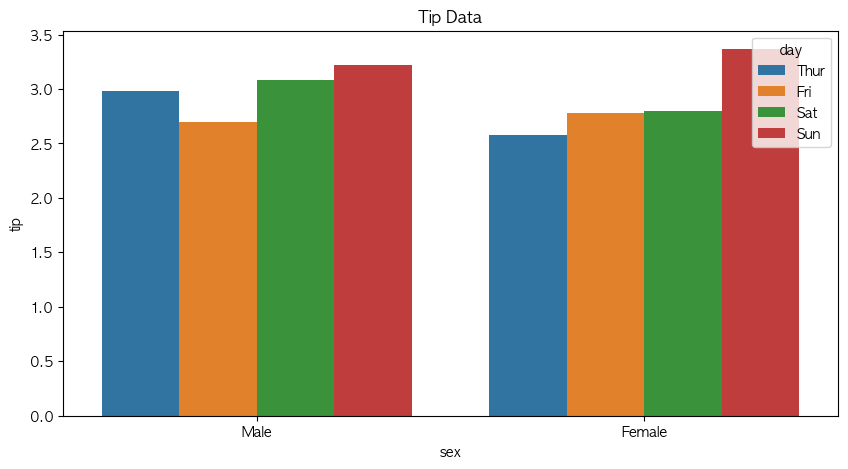

In [14]:
# 기본 사용
# ci 키워드 인수 사용하여 에어 막대 삭제 가능
plt.figure(figsize=(10,5))
sns.barplot(data=tips, x='sex', y='tip', estimator=np.mean, hue='day', ci=None)
plt.title('Tip Data')
plt.show()

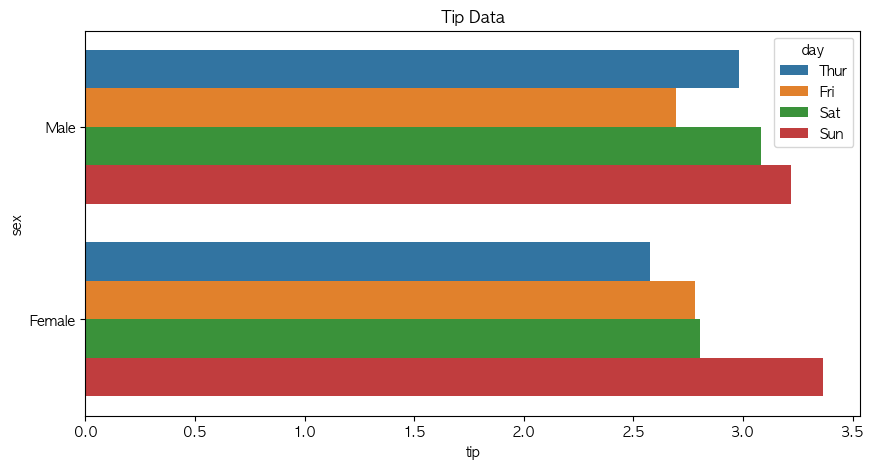

In [17]:
# 기본 사용
# 축을 바꾸어 수평 막대 그래프 가능
plt.figure(figsize=(10,5))
sns.barplot(data=tips, y='sex', x='tip', estimator=np.mean, hue='day', ci=None)
plt.title('Tip Data')
plt.show()

### Box Plot

- 여러 변수들의 통계값(최대, 최소, 평균, 중앙값 등)과 이상치(Outlier) 발견하는데 용이
- 데이터의 전체적인 분포를 확인하기 좋고 카테고리에 따른 실수 데이터 분포 확인
- 변수가 1개일 때는 실수형 값만 입력, 변수가 2개일 때는 카테고리와 실수를 함께 입력

---

- **Maximum:** `Q3에서 1.5 * Interquartile Range(IQR, Q3-Q1)` 위 범위까지 중 최상위
- **Quantile 25%(Q3):** 등수 상 상위 25%
- **Quantile 50%(Q2, Median):** 등수 상 가운데
- **Quantile 25%(Q1):** 등수 상 하위 25%
- **Minimum:** `Q1에서 1.5 * Interquartile Range(IQR, Q3-Q1)` 아래 범위까지 중 최하위


#### 기본 사용

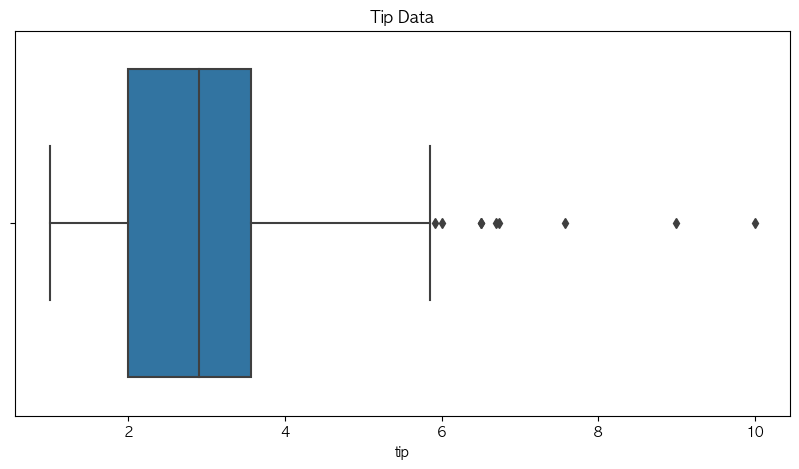

In [18]:
# 기본 사용
# 변수가 1개일 때
plt.figure(figsize=(10,5))
sns.boxplot(data=tips, x='tip')
plt.title('Tip Data')
plt.show()

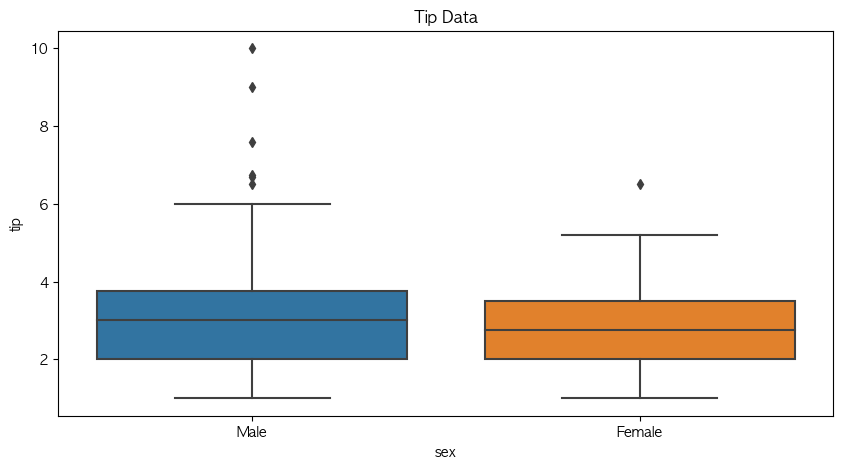

In [20]:
# 기본 사용
# 변수가 2개일 때
plt.figure(figsize=(10,5))
sns.boxplot(data=tips, x='sex', y='tip')
plt.title('Tip Data')
plt.show()

#### hue 속성

세부 집단 추가 가능

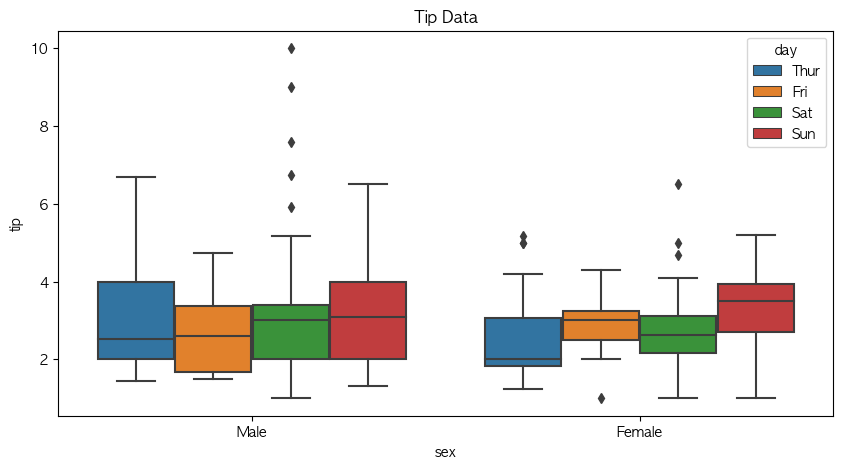

In [21]:
# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
plt.figure(figsize=(10,5))
sns.boxplot(data=tips, x='sex', y='tip', hue='day')
plt.title('Tip Data')
plt.show()

### Violin Plot

- 세로 방향으로 분포를 함께 표시하며 좌우 분포가 대칭이 되어 바이올린처럼 보임
- `boxplot`은 이상치를 한 눈에 파악할 수 있고, `violinplot`은 분포를 한 눈에 파악할 수 있음



#### 기본 사용

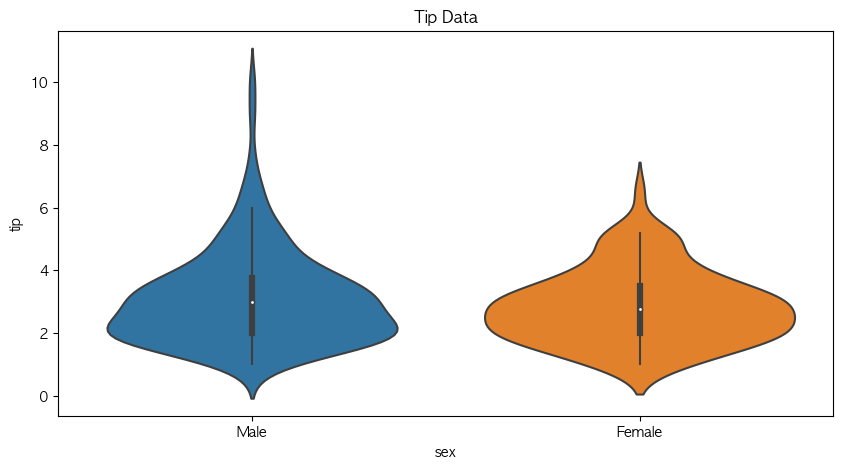

In [22]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.violinplot(data=tips, x='sex', y='tip')
plt.title('Tip Data')
plt.show()

#### hue 속성

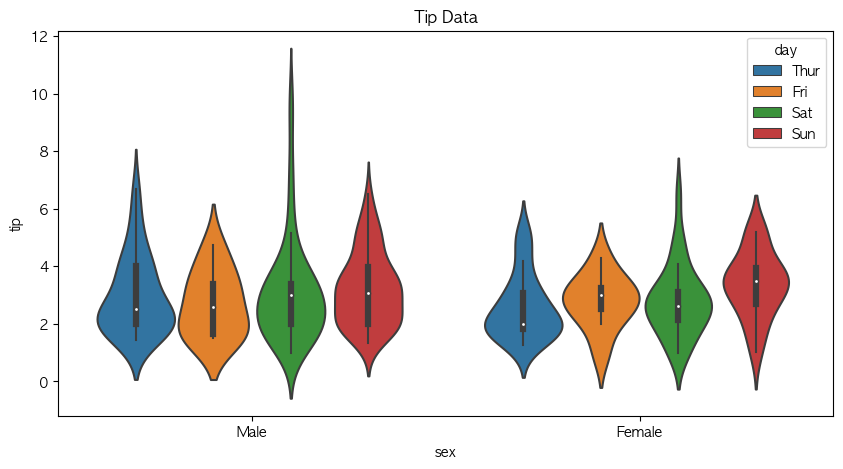

In [23]:
plt.figure(figsize=(10, 5))

sns.violinplot(data=tips, x='sex', y='tip', hue='day')
plt.title('Tip Data')
plt.show()

#### orient 속성

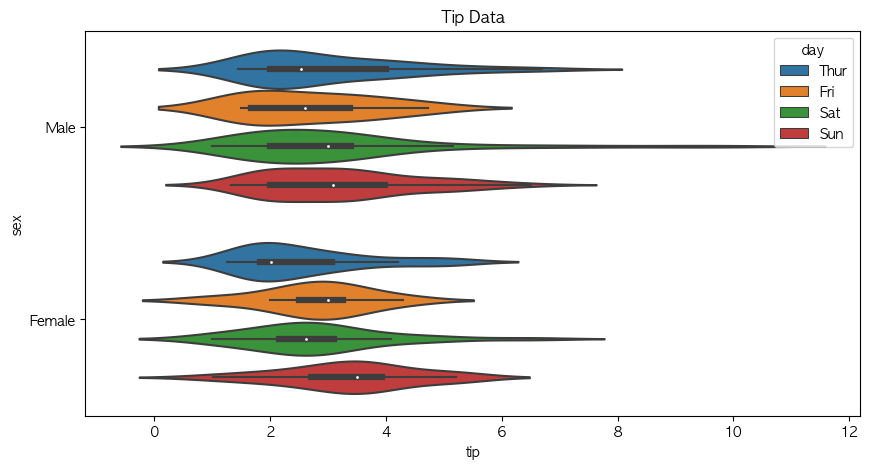

In [24]:
# 기본 사용
# orient 키워드 인수 사용하여 방향 전환 가능
# x와 y의 변수도 변환해야 함
plt.figure(figsize=(10,5))
sns.violinplot(data=tips, y='sex', x='tip', hue='day', orient='h') # 'h' or 'v'
plt.title('Tip Data')
plt.show()

### Strip Plot

- `scatterplot`이 실수형과 실수형 사이의 관계를 시각화 한다면, `stripplot`은 실수형 변수와 카테고리형 사이의 관계를 scatterplot


#### 기본 사용

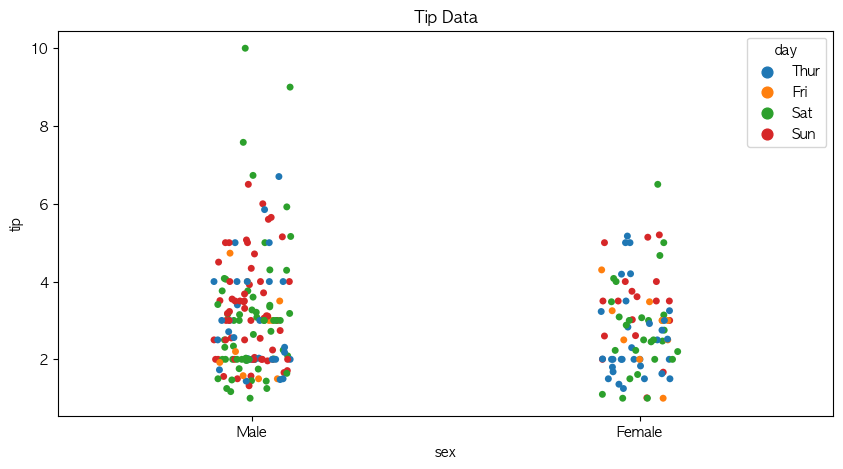

In [29]:
# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
plt.figure(figsize=(10,5))
sns.stripplot(data=tips, x='sex', y='tip', hue='day')
plt.title('Tip Data')
plt.show()

#### orient 속성

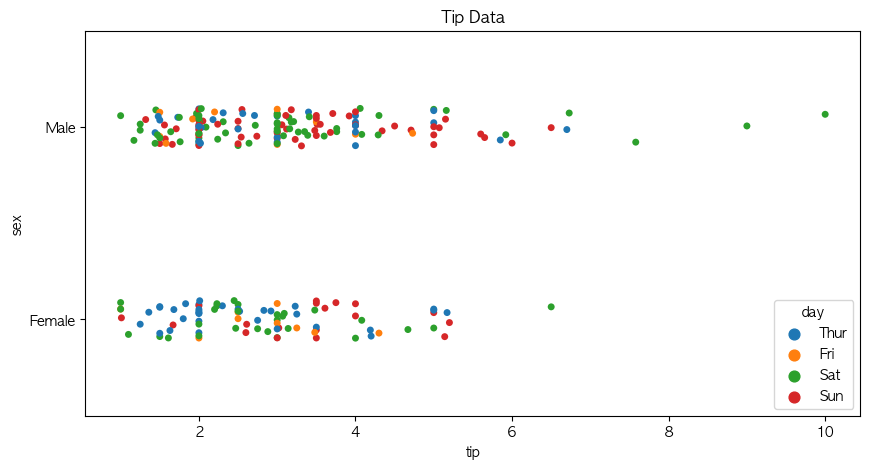

In [32]:
# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
plt.figure(figsize=(10,5))
sns.stripplot(data=tips, y='sex', x='tip', hue='day', orient='h')
plt.title('Tip Data')
plt.show()

### Swarm Plot
- `stripplot`과 유사하지만 데이터가 겹치지 않도록 표현하는 분포 효과
- 종종 `violinplot`과 함께 쓰이면 효과 좋음


#### 기본 사용

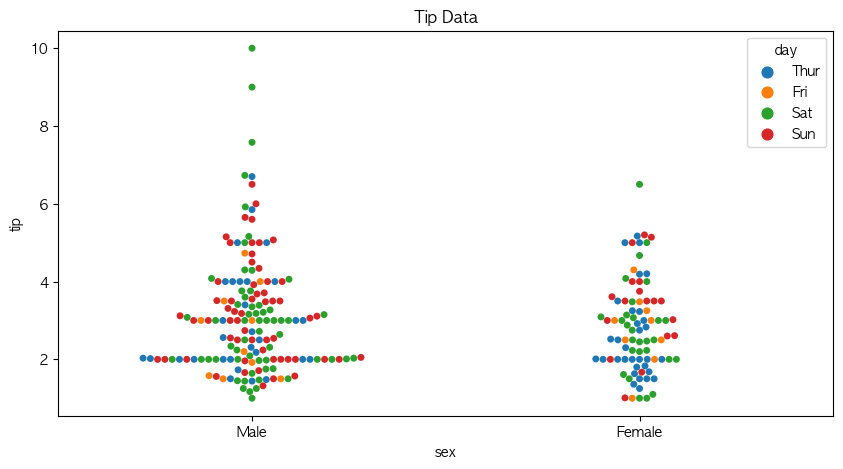

In [33]:
# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
plt.figure(figsize=(10,5))
sns.swarmplot(data=tips, x='sex', y='tip', hue='day')
plt.title('Tip Data')
plt.show()

#### Orient 속성

/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


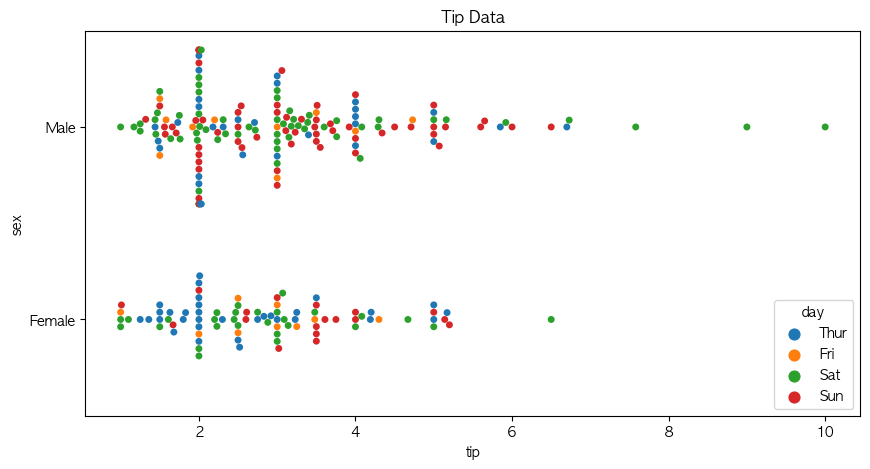

In [34]:
# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
plt.figure(figsize=(10,5))
sns.swarmplot(data=tips, x='tip', y='sex', hue='day', orient='h')
plt.title('Tip Data')
plt.show()

#### violinplot과 함께 표현

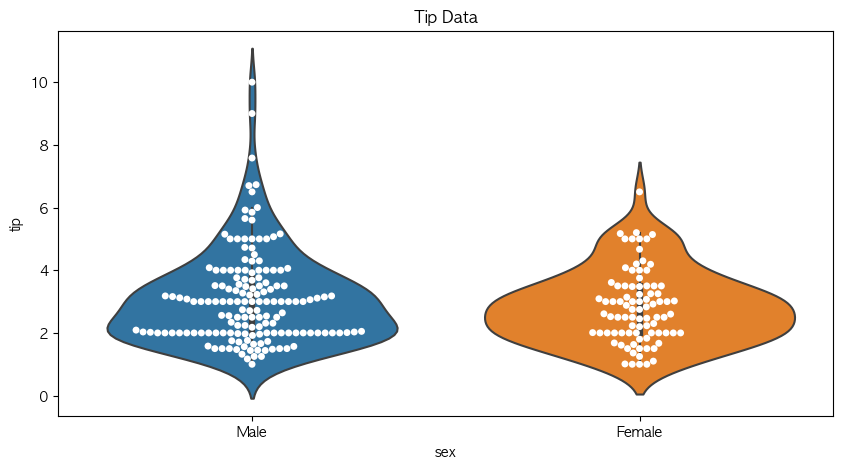

In [35]:
# 기본 사용
# violinplot과 함께 표현
plt.figure(figsize=(10,5))
sns.violinplot(data=tips, x='sex', y='tip')
sns.swarmplot(data=tips, x='sex', y='tip', color='white')
plt.title('Tip Data')
plt.show()

### Point Plot
- 실수형 변수와 카테고리형 변수의 관계를 `Error Bar`와 함께 그려주는 그래프
- 카테고리형 값의 변화에 따른 차이도 함께 표현


#### 기본 사용

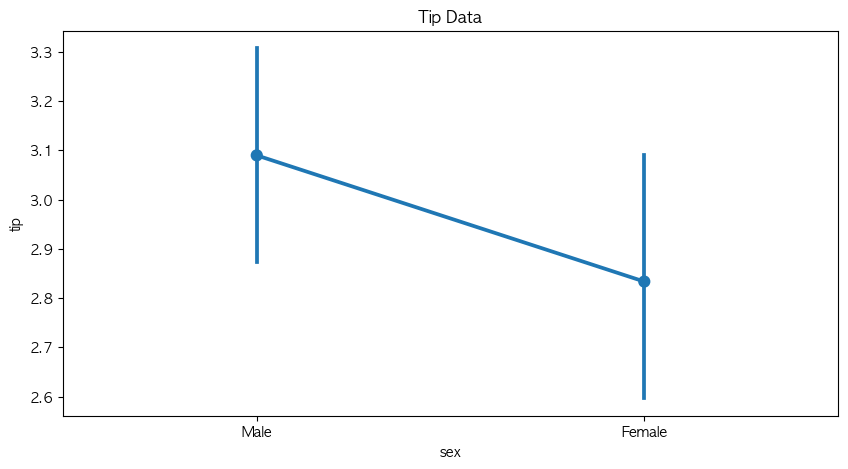

In [37]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.pointplot(data=tips, x='sex', y='tip')
plt.title('Tip Data')
plt.show()

#### hue 속성

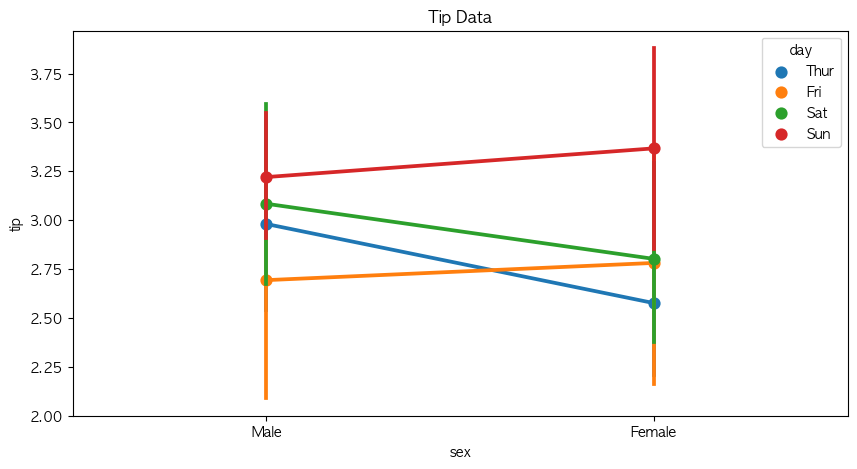

In [38]:
# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
plt.figure(figsize=(10,5))
sns.pointplot(data=tips, x='sex', y='tip', hue='day')
plt.title('Tip Data')
plt.show()

#### Orient 속성

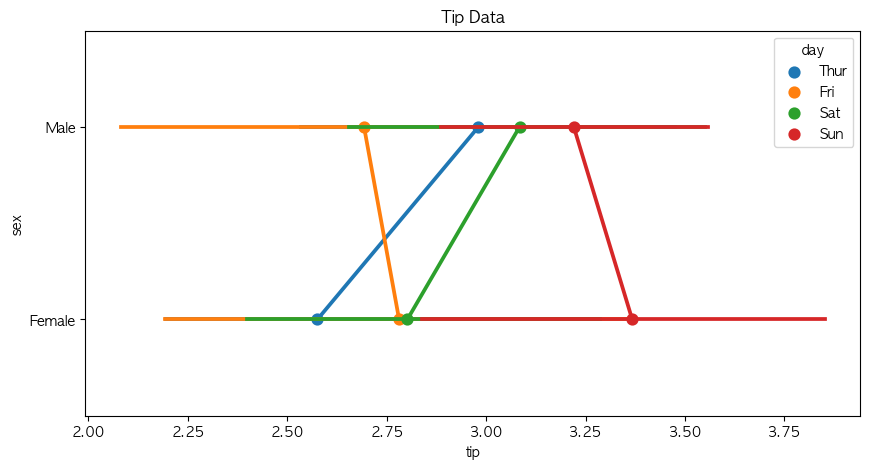

In [39]:
# 기본 사용
# orient 키워드 인수 사용하여 방향 전환 가능
# x와 y의 변수도 변환해야 함
plt.figure(figsize=(10,5))
sns.pointplot(data=tips, y='sex', x='tip', hue='day', orient='h')
plt.title('Tip Data')
plt.show()

### Categorical Plot

- 모든 `Categorical Plots`를 `catplot`으로 모두 그릴 수 있음
- `kind` 키워드 인수를 사용하여 설정 가능: `count, bar, box, violin, strip(기본값), swarm, point`
- `relplot, displot`과 마찬가지로 서브 플롯 가능 (row, col 키워드 인자로 설정)

#### 기본 사용

<Figure size 1000x500 with 0 Axes>

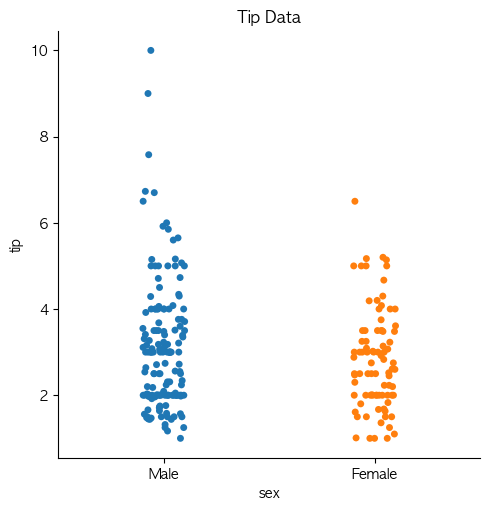

In [40]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.catplot(data=tips, x='sex', y='tip')
plt.title('Tip Data')
plt.show()

#### kind - “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, “count”

<Figure size 1000x500 with 0 Axes>

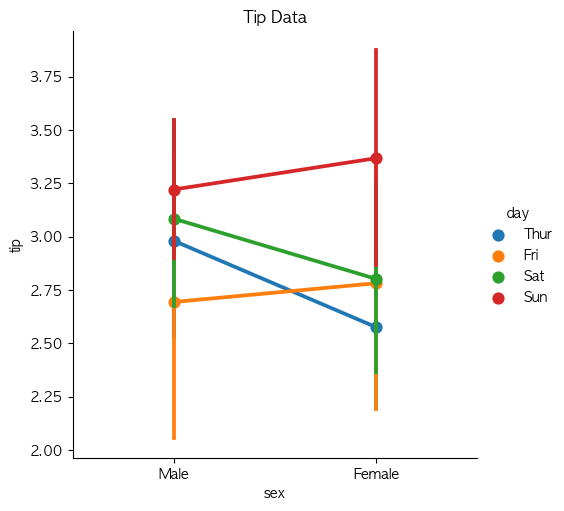

In [48]:
# 기본 사용
# kind 키워드 인수 사용하여 형태 변경 가능
plt.figure(figsize=(10,5))
sns.catplot(data=tips, x='sex', y='tip', hue='day', kind='point')
plt.title('Tip Data')
plt.show()

<Figure size 1000x500 with 0 Axes>

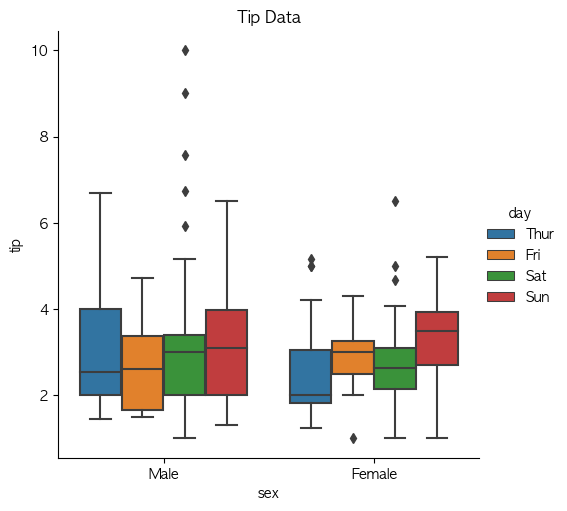

In [46]:
# 기본 사용
# kind 키워드 인수 사용하여 형태 변경 가능
plt.figure(figsize=(10,5))
sns.catplot(data=tips, x='sex', y='tip', hue='day', kind='box')
plt.title('Tip Data')
plt.show()

<Figure size 1000x500 with 0 Axes>

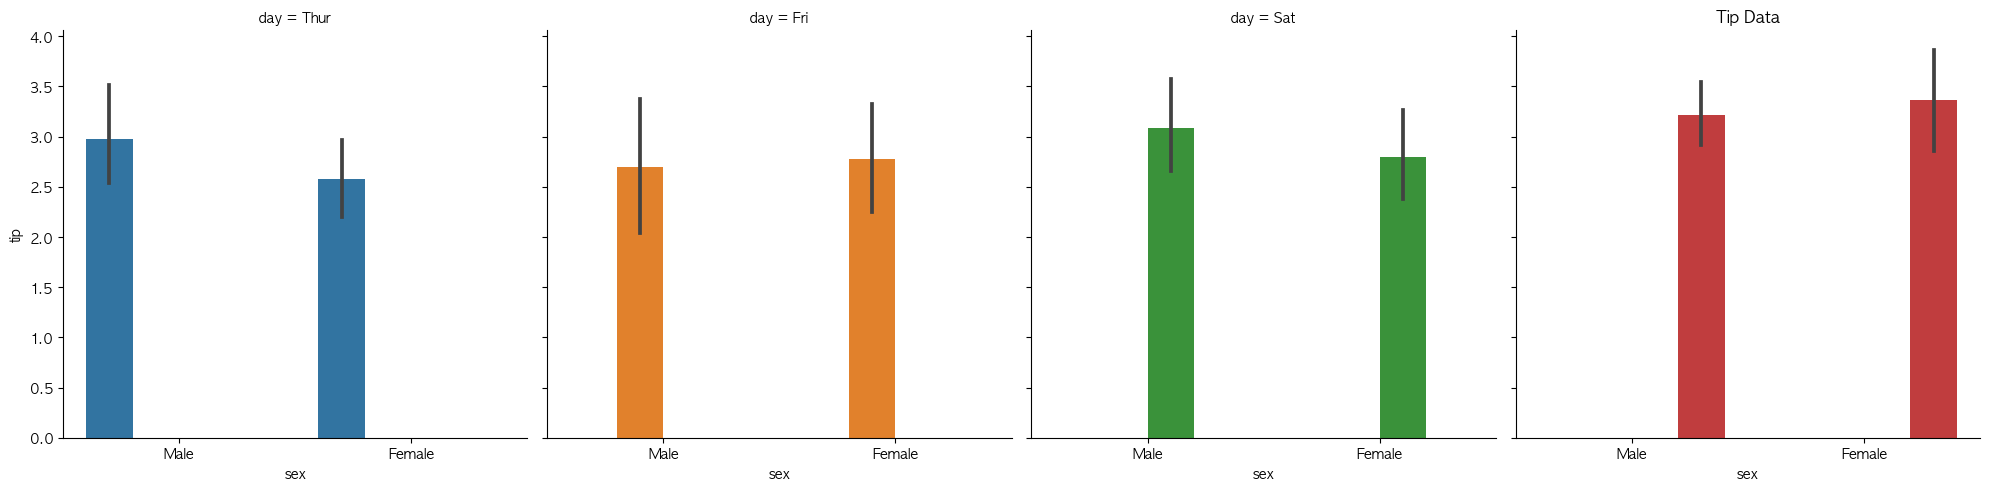

In [42]:
# 기본 사용
# col 키워드 인수 사용하여 subplot 표현 가능
plt.figure(figsize=(10,5))
sns.catplot(data=tips, x='sex', y='tip', hue='day', kind='bar', col='day')
plt.title('Tip Data')
plt.show()

## 카테고리형들 간의 데이터 관계 확인(Matrix Plots)

카테고리형들 간의 데이터 관계 확인

> **"카테고리형 변수들 간의 비율을 2차원 행렬로 만들고 그 비율에 색을 입혀 시각화"**

### Heatmap

- 카테고리 항목 조합들에 따른 값의 분포를 확인하는데 사용
- 기본적으로 2차원 데이터가 필수


#### 2차원 행렬 데이터 생성

In [49]:
# 카테고리 별 값 추출
# 2차원 데이터 생성
titanic_survived = titanic.pivot_table(index='survived', columns='class', aggfunc='size')
titanic_survived

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


#### 기본 사용

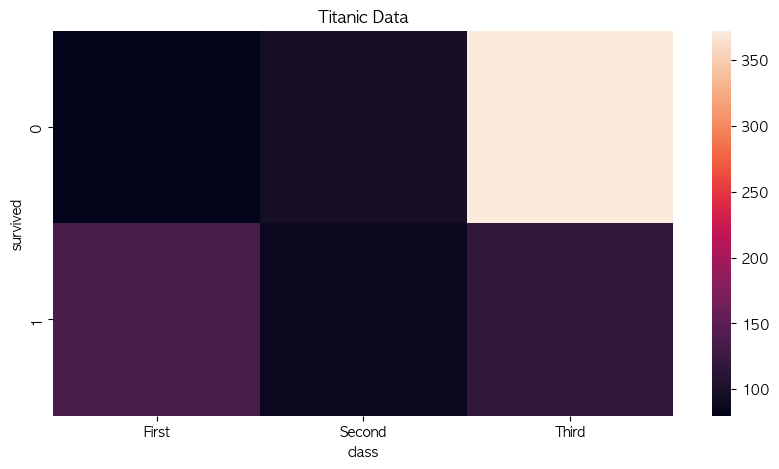

In [50]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.heatmap(data=titanic_survived)
plt.title('Titanic Data')
plt.show()

#### heatmap(annot, fmt, cmap) 

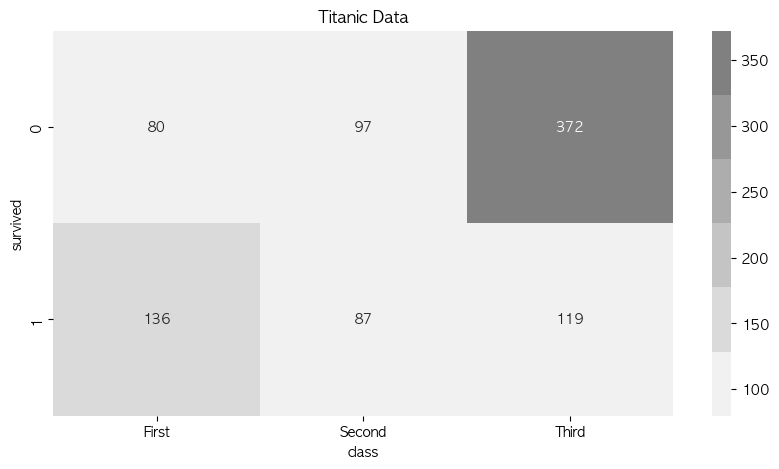

In [53]:
# 기본 사용
# 값의 표시, 정수형 출력, 색상변경 가능
plt.figure(figsize=(10,5))
sns.heatmap(data=titanic_survived, annot=True, fmt='d', cmap=sns.light_palette('gray'))
plt.title('Titanic Data')
plt.show()

### Distribution Plots
> **"실수형 변수 하나(x) 또는 두개(x,y)의 데이터 값 분포를 파악하기 위한 시각화"**

- `hisplot`
- `kdeplot`
- `rugplot`
- `ecdfplot`
- `displot`: histplot + kdeplot + rugplot + ecdfplot

#### Histogram Plot 

`histplot` : 히스토그램 시각화 함수로 데이터의 빈도수를 파악

##### 기본 사용

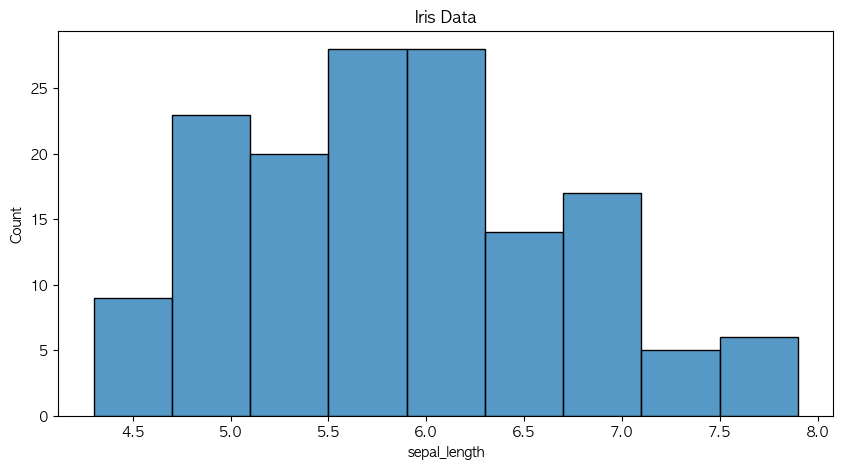

In [54]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.histplot(data=iris, x='sepal_length')
plt.title('Iris Data')
plt.show()

##### histplot(hue, multiple)

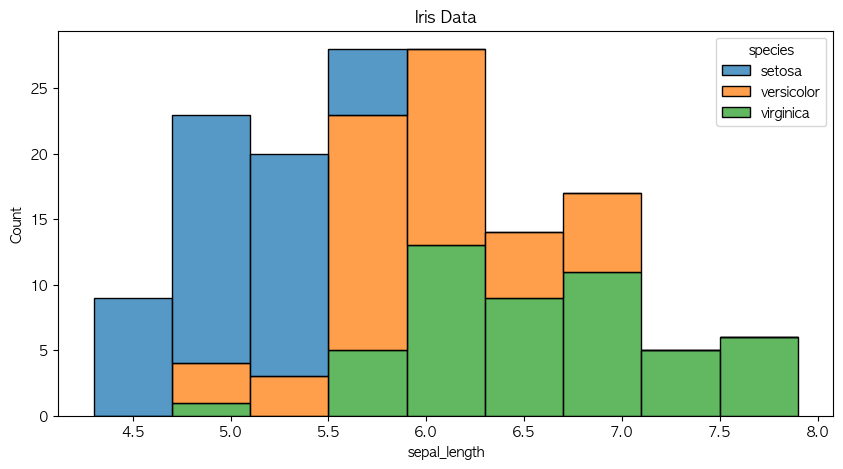

In [55]:
# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
# multiple 키워드 인수 사용으로 hue로 분류된 count가 누적되어서 중첩되지 않도록 표현
plt.figure(figsize=(10,5))
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='stack')
plt.title('Iris Data')
plt.show()

##### histplot(kde)

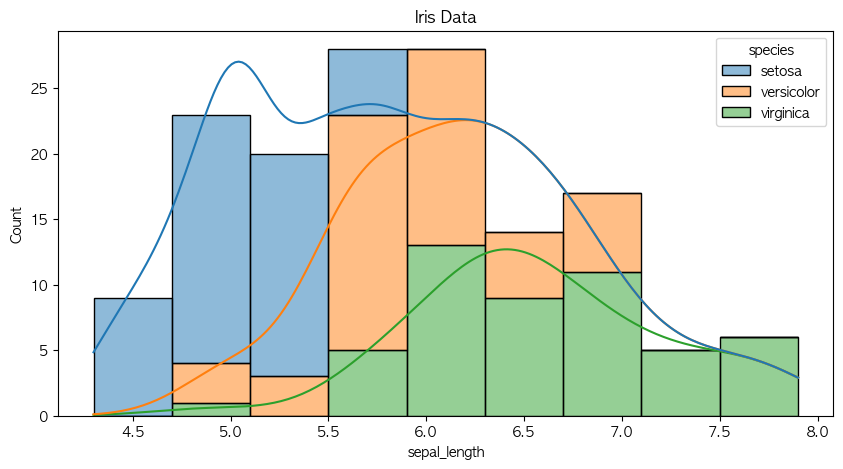

In [56]:
# 기본 사용
# kde 키워드 인수 사용하여 이어진 분포고 함께 표현 가능
plt.figure(figsize=(10,5))
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='stack', kde=True)
plt.title('Iris Data')
plt.show()

#### Kernel Density Plot
- `kdeplot`: `histplot`이 `count(절대량)`을 표현한다면 `kdeplot`은 `ratio(상대량)`을 표현


##### 기본 사용

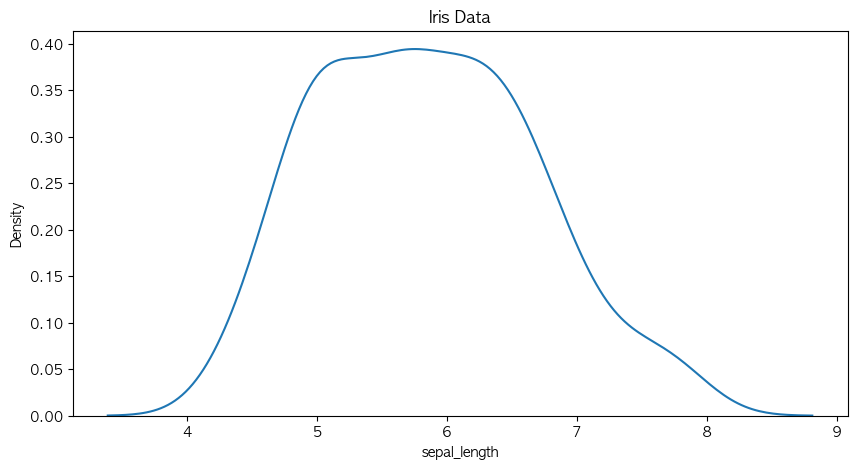

In [59]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.kdeplot(data=iris, x='sepal_length')
plt.title('Iris Data')
plt.show()

##### hue

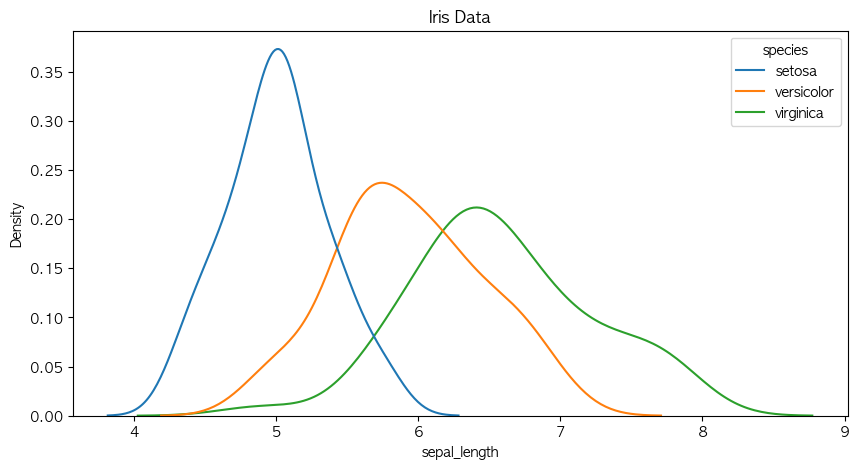

In [63]:
# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
plt.figure(figsize=(10,5))
sns.kdeplot(data=iris, x='sepal_length', hue='species')
plt.title('Iris Data')
plt.show()

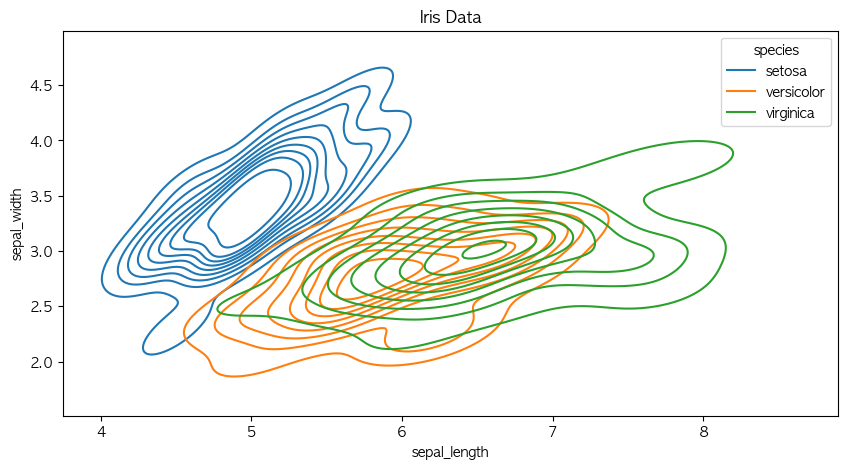

In [64]:
# 기본 사용
# Y축도 변수를 지정하면 마치 등고선과 같은 그래프 시각화
plt.figure(figsize=(10,5))
sns.kdeplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Iris Data')
plt.show()

#### Rug Plot

- `rugplot`: 데이터의 실제 위치를 x축 위에 작은 선분(rug)으로 표현
- 주로 `kdeplot`과 함께 사용하여 분포와 데이터의 위치를 함께 표현하는 편


##### 기본 사용

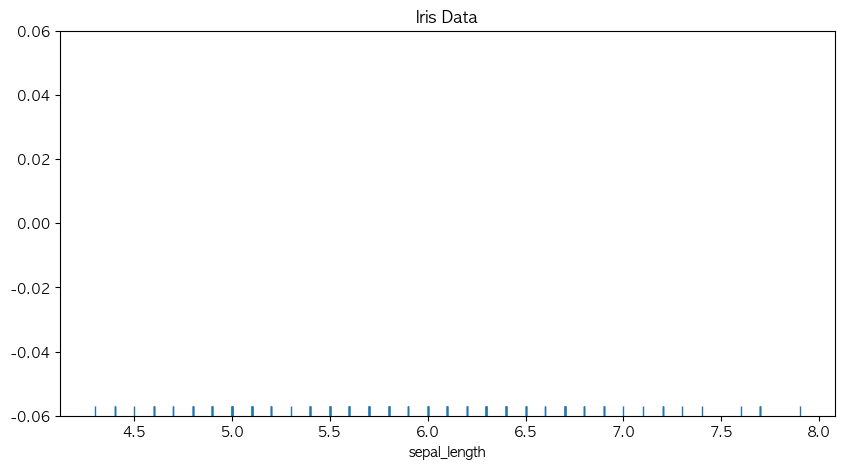

In [65]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.rugplot(data=iris, x='sepal_length')
plt.title('Iris Data')
plt.show()

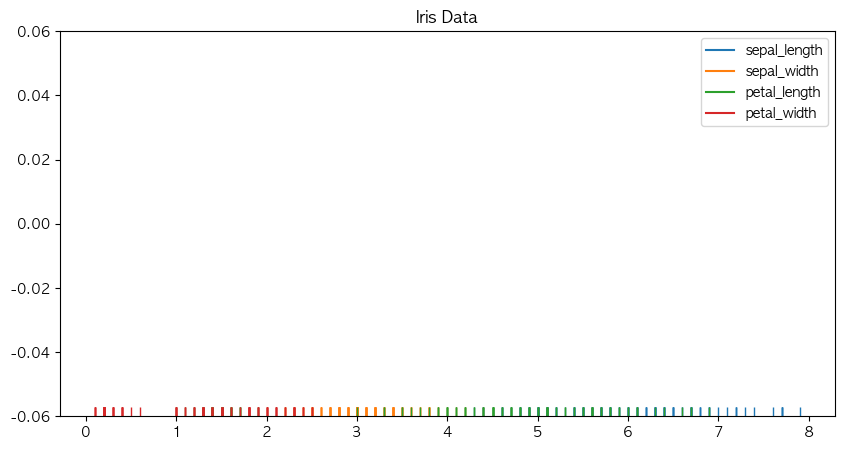

In [66]:
# 기본 사용
# data 키워드 인수로 전체 표현은 가능하나 1차원으로 표현
plt.figure(figsize=(10,5))
sns.rugplot(data=iris)
plt.title('Iris Data')
plt.show()

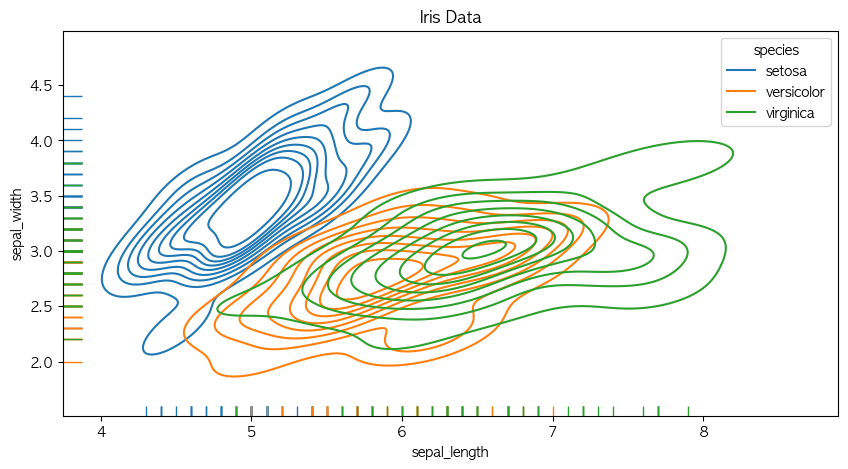

In [67]:
# 기본 사용
# kdeplot과 함께 표현시 해석이 용이
plt.figure(figsize=(10,5))
sns.kdeplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
sns.rugplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Iris Data')
plt.show()

#### Cumulative Distribution Plot

- `ecdfplot`: 데이터의 분포를 누적하여 증감 속도 확인


##### 기본 사용

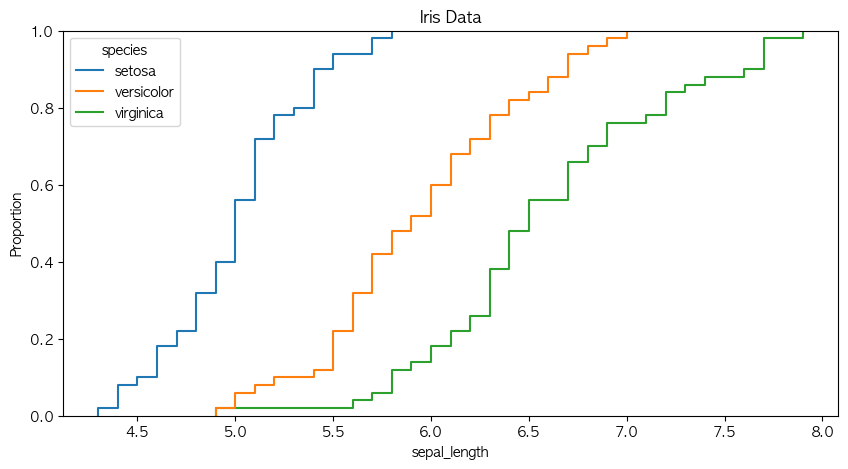

In [68]:
# 기본 사용
# ecdfplot
plt.figure(figsize=(10,5))
sns.ecdfplot(data=iris, x='sepal_length', hue='species')
plt.title('Iris Data')
plt.show()

#### Distribution Plot

- `displot`: histplot + kdeplot + rugplot + ecdfplot을 모두 포함하여 빈도(count)까지 표현
- `kind` 키워드 인수를 `histplot, kdeplot, ecdfplot`로 설정하여 3가지 plot을 그릴 수 있고, `rug` 키워드 인수를 `True/False`로 설정하여 반영가능
- `kind`의 기본값은 `hist`로 아무 설정이 없을 때는 `histplot`

<Figure size 1000x500 with 0 Axes>

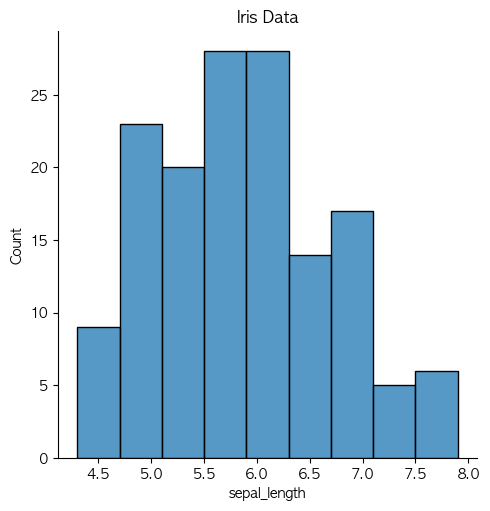

In [69]:
# 기본 사용
plt.figure(figsize=(10,5))
sns.displot(data=iris, x='sepal_length')
plt.title('Iris Data')
plt.show()

<Figure size 1000x500 with 0 Axes>

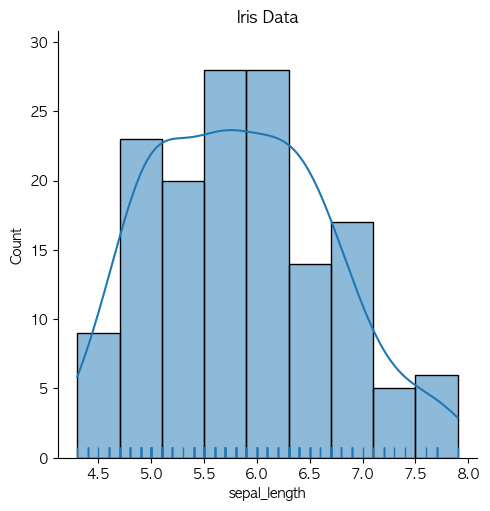

In [70]:
# 기본 사용
# kde, rug 모두 포함
plt.figure(figsize=(10,5))
sns.displot(data=iris, x='sepal_length', kde=True, rug=True)
plt.title('Iris Data')
plt.show()

<Figure size 1000x500 with 0 Axes>

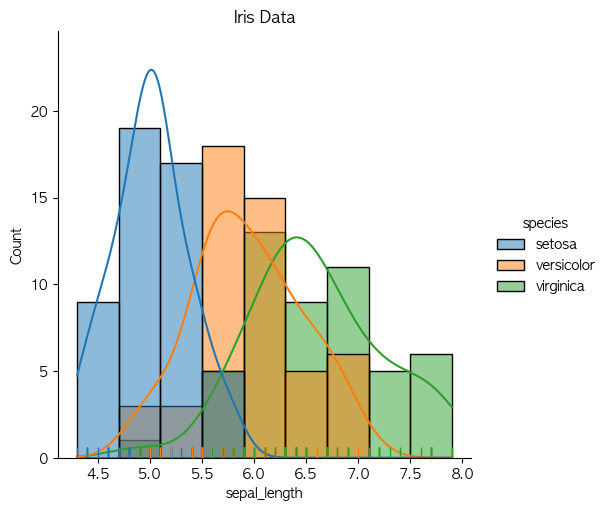

In [71]:
# 기본 사용
# hue 키워드 인수 사용하여 세부 집단 추가 가능
plt.figure(figsize=(10,5))
sns.displot(data=iris, x='sepal_length', hue='species', kde=True, rug=True)
plt.title('Iris Data')
plt.show()

<Figure size 1000x500 with 0 Axes>

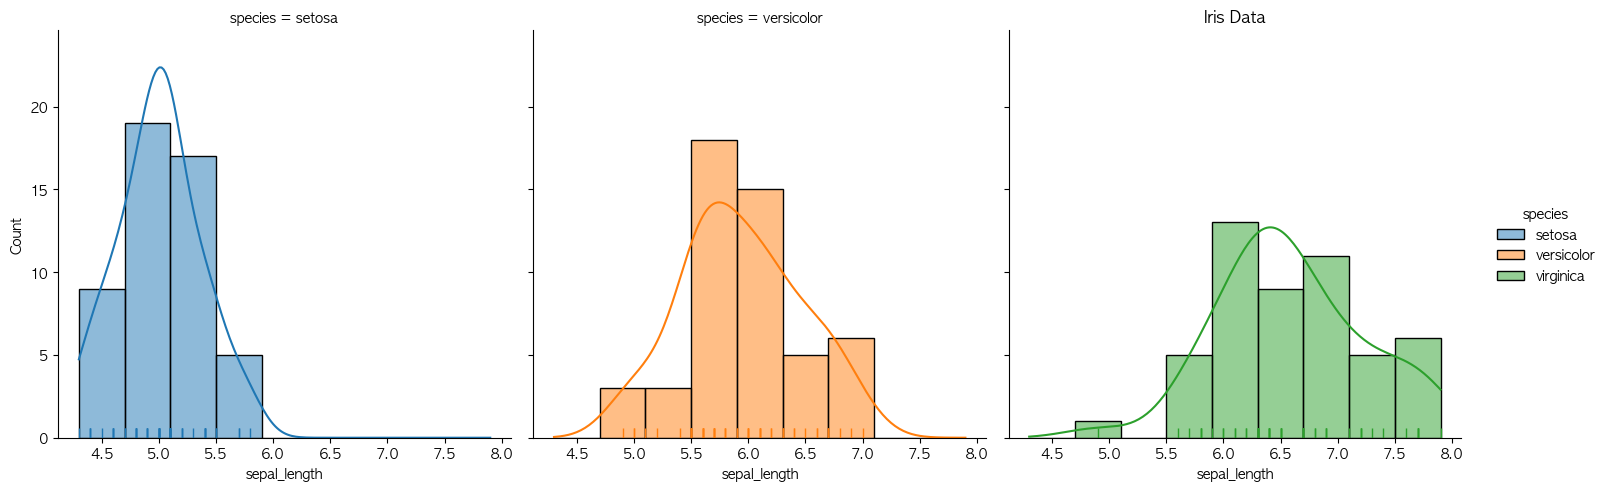

In [72]:
# 기본 사용
# col 키워드 인수 사용하여 subplot 표현 가능
plt.figure(figsize=(10,5))
sns.displot(data=iris, x='sepal_length', hue='species', kde=True, rug=True, col='species')
plt.title('Iris Data')
plt.show()

## 실수형 데이터 관계 확인(Relational Plots)